### Tests

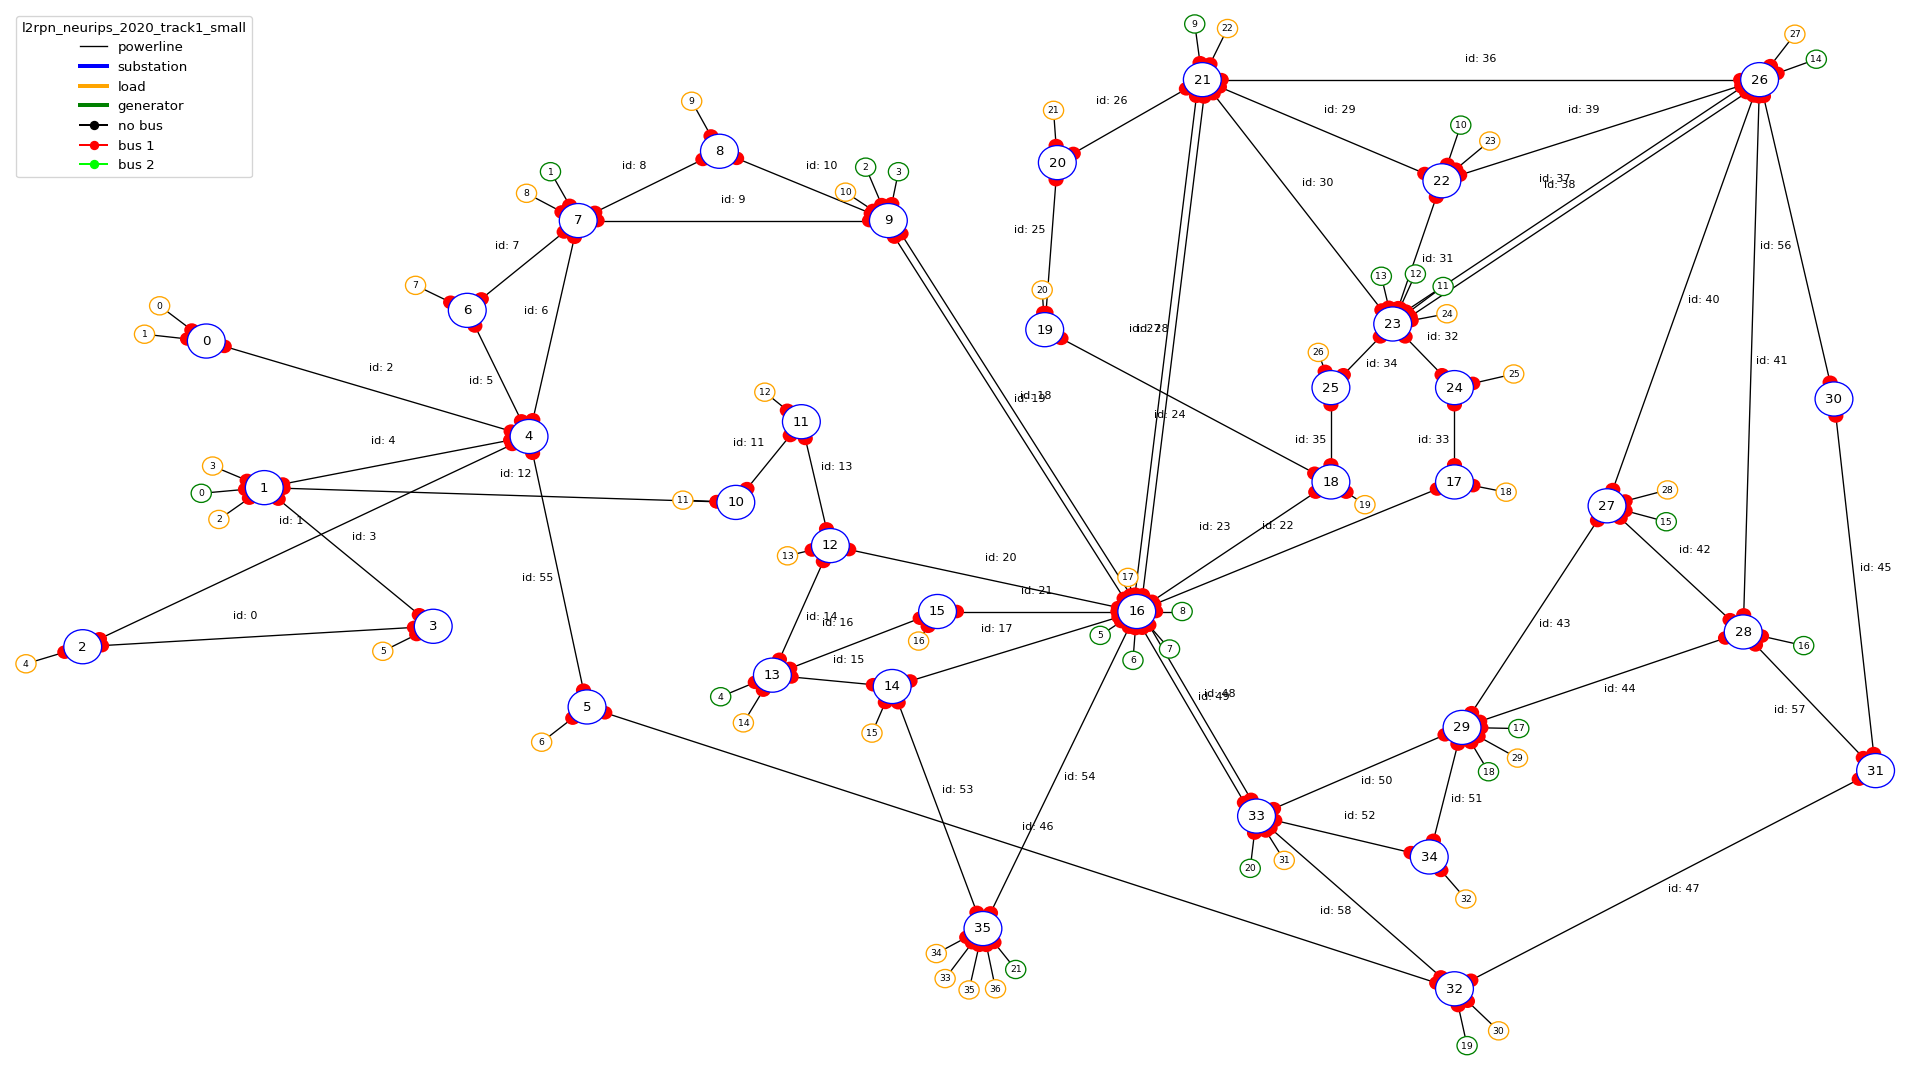

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import grid2op
import tqdm
assert grid2op.__version__ >= "1.1.0", "You need grid2op at least 1.1.0 to compete in this track."
from grid2op.PlotGrid import PlotMatplot

env = grid2op.make("l2rpn_neurips_2020_track1_small")
env.seed(3)  # for reproducible experiments
plot_helper = PlotMatplot(env.observation_space, width=1920, height=1080, line_id=True)
_ = plot_helper.plot_layout()

In [2]:
obs = env.reset()
obs.to_dict().keys()

dict_keys(['timestep_overflow', 'line_status', 'topo_vect', 'loads', 'prods', 'lines_or', 'lines_ex', 'rho', 'maintenance', 'cooldown', 'redispatching'])

In [3]:
obs.to_vect().shape

(1266,)

In [4]:
obs.to_dict()['topo_vect'].shape

(177,)

In [8]:
env.n_line

59

In [89]:
action_space = env.action_space

change_status = action_space.get_change_line_status_vect()

In [91]:
env.n_gen + env.n_load + 2 * env.n_line

177

In [93]:
change_bus = 0 * obs.topo_vect

act = action_space({'change_bus': change_bus, 'change_line_status': change_status})
print(act)

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - NOT force any particular bus configuration


In [100]:
x = np.zeros(action_space.dim_topo, dtype = 'int64')
x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [79]:
obs, reward, done, info = env.step(act)
info

{'disc_lines': array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False]),
 'is_illegal': False,
 'is_ambiguous': False,
 'is_dispatching_illegal': False,
 'is_illegal_reco': False,
 'opponent_attack_line': None,
 'opponent_attack_sub': None,
 'opponent_attack_duration': 0,
 'exception': [Grid2OpException DivergingPowerFlow DivergingPowerFlow('GAME OVER: Powerflow has diverged during computation or a load has been disconnected or a generator has been disconnected.')],
 'rewards': {}}

In [57]:
len(ids)

118

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - force disconnection of 1 powerlines ([17])
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - NOT force any particular bus configuration 990.73364 False
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1]


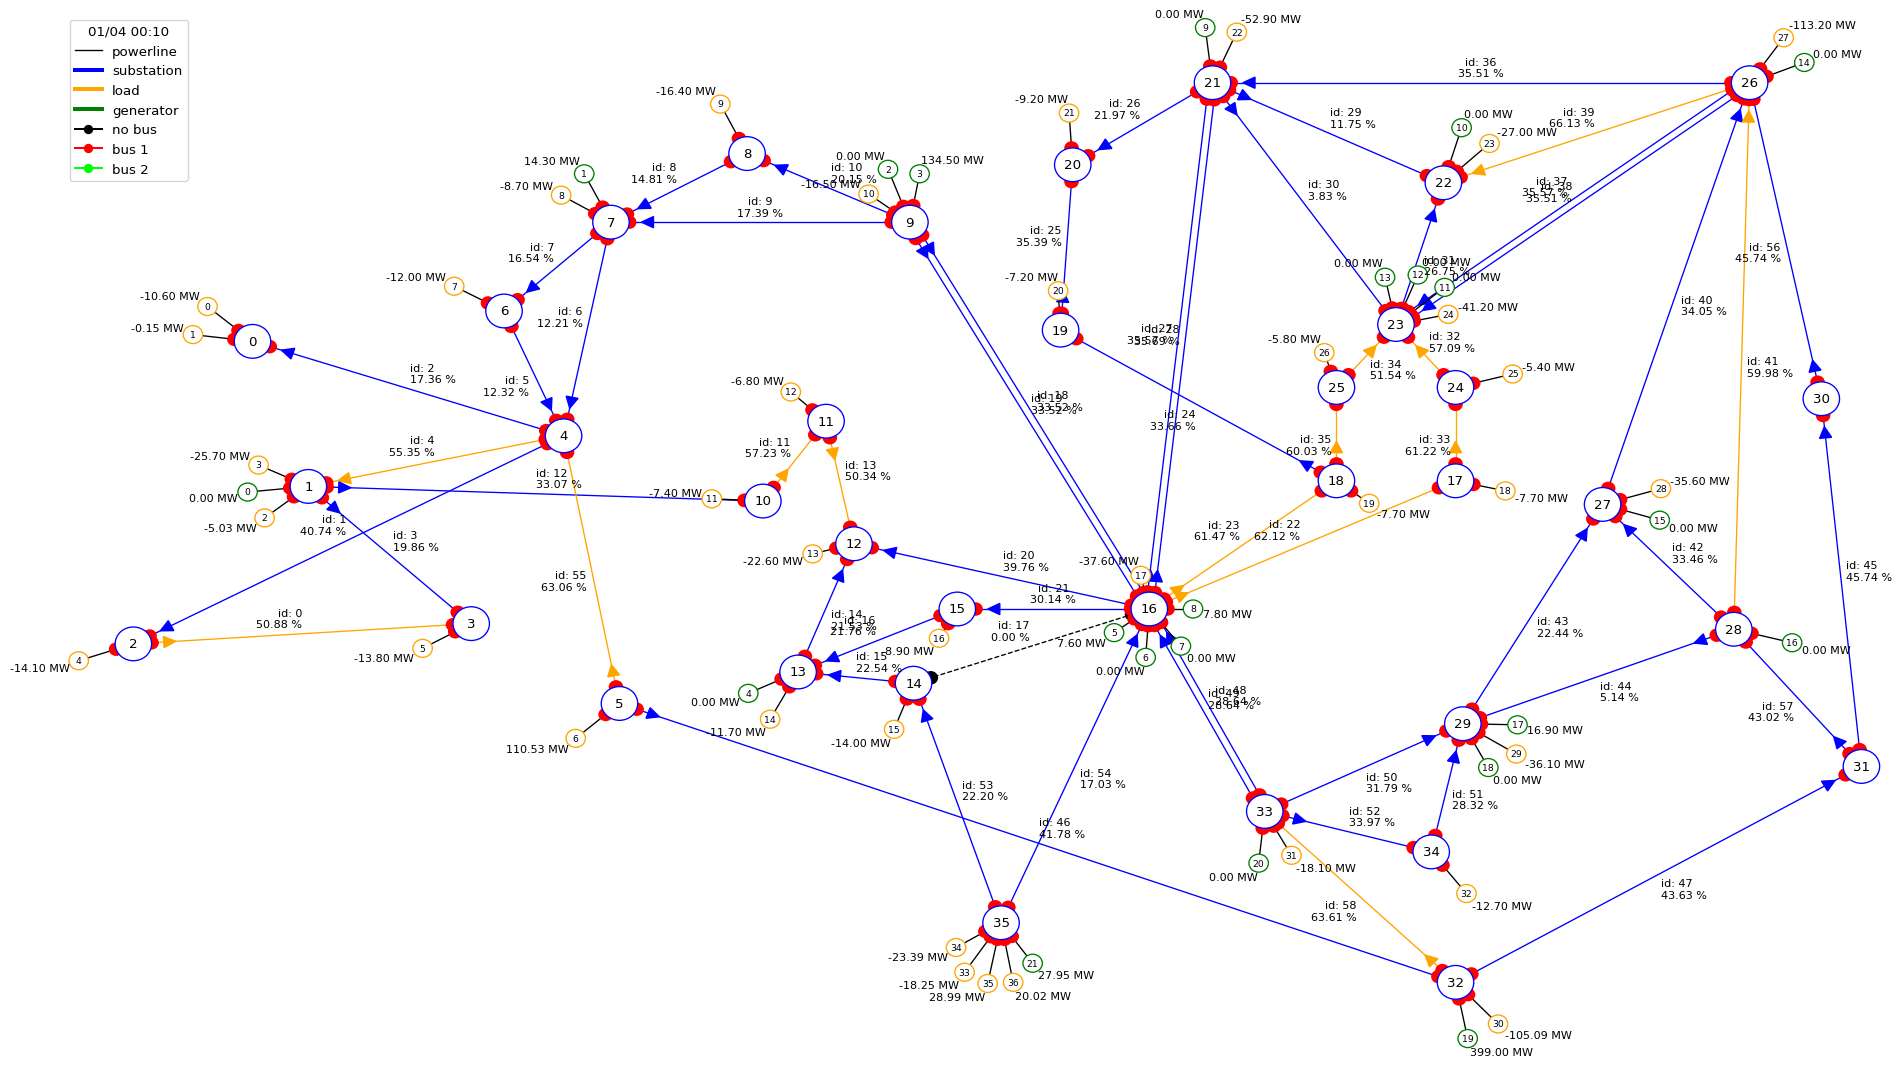

In [86]:
obs = env.reset()

l_id = 17
disconnect_line_3 = env.action_space({"set_line_status": [(l_id, -1)]})

obs, reward, done, info = env.step(disconnect_line_3)
print(disconnect_line_3, reward, done)
print(obs.to_dict()['topo_vect'])

fig = plot_helper.plot_obs(obs)

988.72064 False
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1]
990.0846 False
[ 1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 

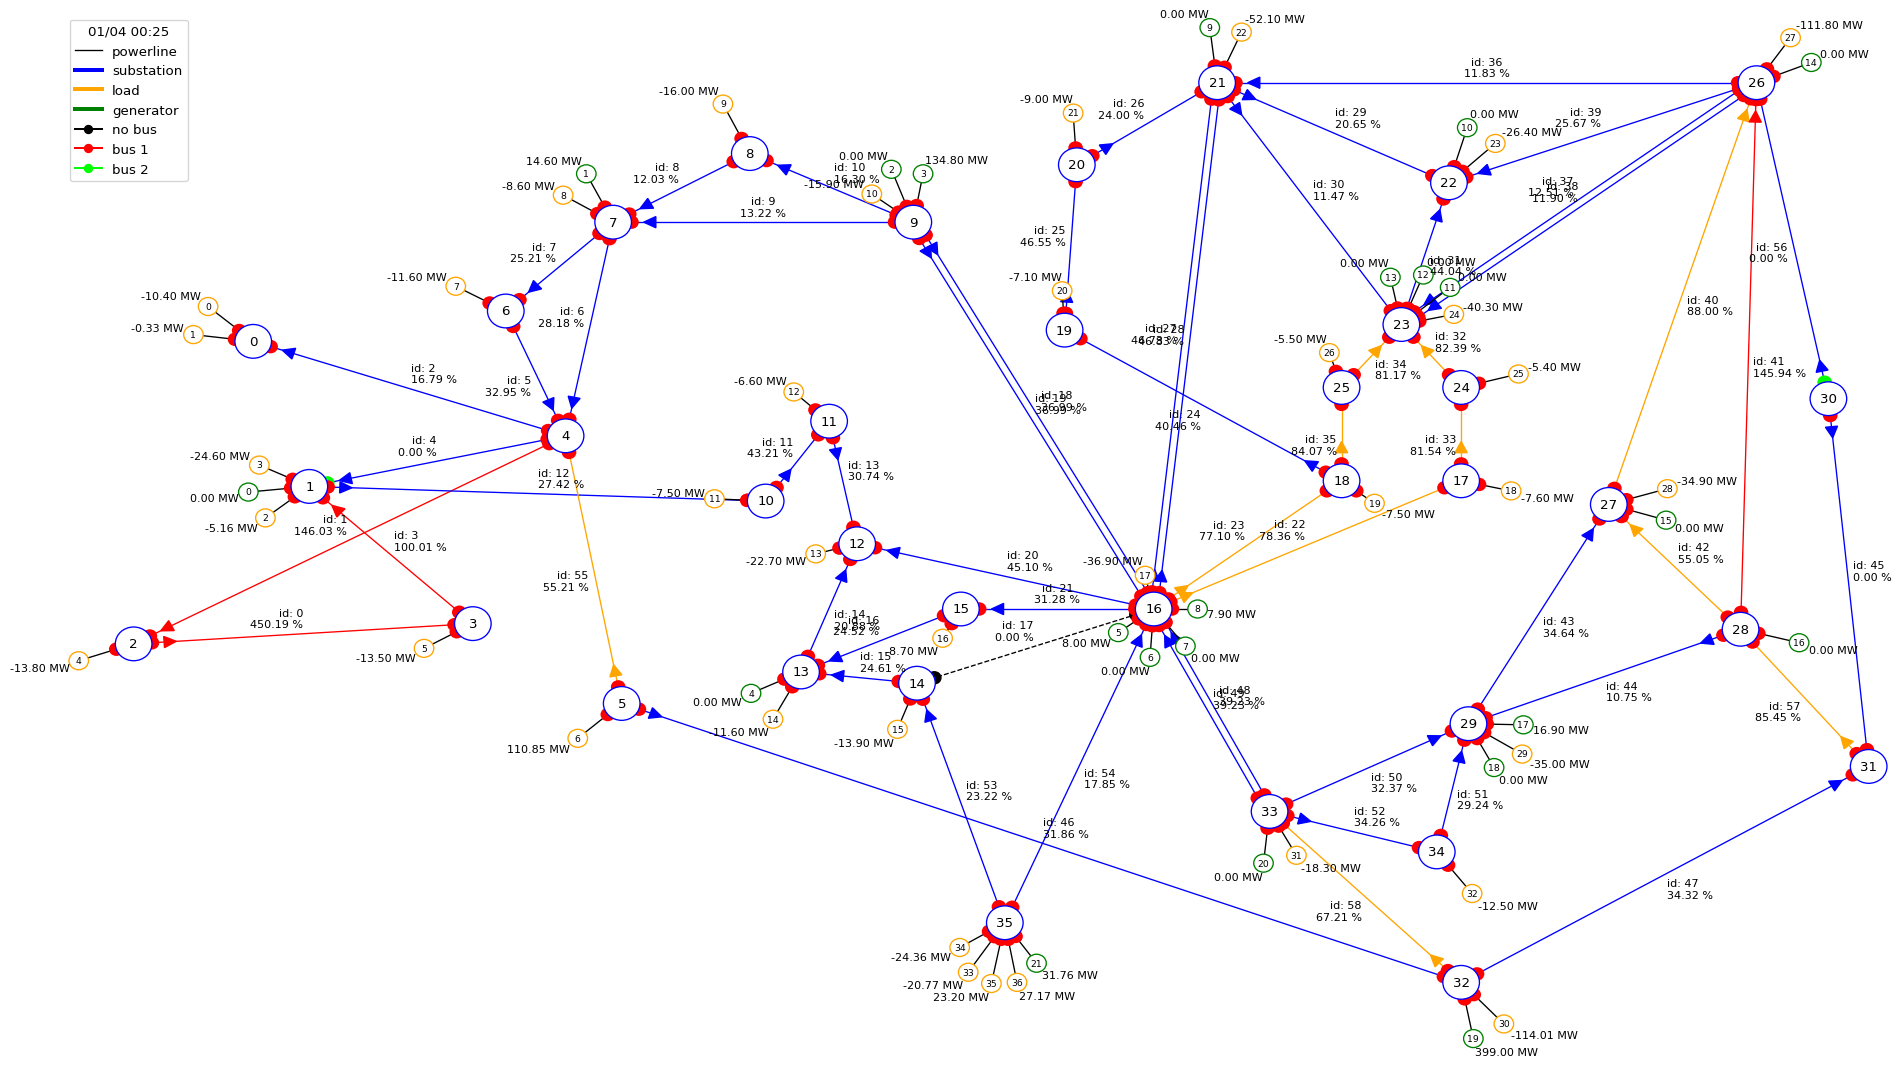

In [87]:
while not done:
    id_ = np.random.choice(env.name_line)
    act = action_space.set_bus(id_, # mandatory name of the element
                         extremity="or", # mandatory, which extrmity to change
                         new_bus=2, # mandatory the new bus to connect it too
                         type_element="line", # optional the type of the element, one of "line", "gen" or "load"
                         previous_action=None  # optional: if you want to combine multiple action, you can do it with this
                        )
    obs, reward, done, info = env.step(act)
    print(reward, done)
    print(obs.to_dict()['topo_vect'])

fig = plot_helper.plot_obs(obs)

In [91]:
obs.to_dict()

{'timestep_overflow': array([2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
 'line_status': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True]),
 'topo_vect': array([ 1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1, 

236

In [88]:
env.reward_range

(-10.0, 484.27502)

In [12]:
from grid2op.Converter import IdToAct

action_space = env.action_space
converter = IdToAct(action_space)
converter.init_converter()

In [13]:
print('Total # of actions: ', len(converter.all_actions))

Total # of actions:  134163


### Benchmark do nothing

In [3]:
N_EPISODES = 20
ep_rewards = []
ep_steps = []
for n in range(N_EPISODES):
    obs = env.reset()
    cum_reward = 0
    steps = 0
    done = False
    while not done:
        do_nothing_act = env.helper_action_player({})
        obs, reward, done, info = env.step(do_nothing_act)
        cum_reward += reward
        steps += 1
    print('Episode %d total_reward: %.2f total_steps: %d' % (n, cum_reward, steps))
    ep_rewards.append(cum_reward)
    ep_steps.append(ep_steps)

Episode 0 total_reward: 121357.71 total_steps: 153
Episode 1 total_reward: 379212.77 total_steps: 389
Episode 2 total_reward: 152865.53 total_steps: 197
Episode 3 total_reward: 666296.84 total_steps: 687
Episode 4 total_reward: 32609.12 total_steps: 39
Episode 5 total_reward: 474601.33 total_steps: 506
Episode 6 total_reward: 80324.18 total_steps: 95
Episode 7 total_reward: 544505.73 total_steps: 570
Episode 8 total_reward: 152084.63 total_steps: 196
Episode 9 total_reward: 354678.52 total_steps: 362
Episode 10 total_reward: 152084.63 total_steps: 196
Episode 11 total_reward: 252738.47 total_steps: 267
Episode 12 total_reward: 151303.60 total_steps: 195
Episode 13 total_reward: 666295.46 total_steps: 687
Episode 14 total_reward: 152084.63 total_steps: 196
Episode 15 total_reward: 112405.89 total_steps: 110
Episode 16 total_reward: 80324.90 total_steps: 95
Episode 17 total_reward: 412806.73 total_steps: 432
Episode 18 total_reward: 2501.46 total_steps: 4
Episode 19 total_reward: 88837.1

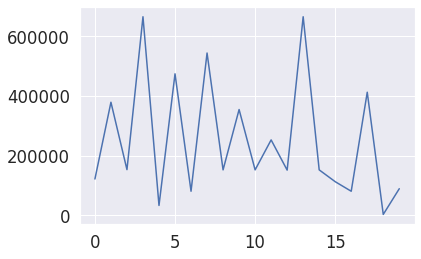

In [4]:
sns.set(style="darkgrid", font_scale=1.5)
sns.lineplot(x = range(len(ep_rewards)), y = ep_rewards, ci = 'sd')

In [ ]:
#sns.lineplot(x = range(len(ep_steps)), y = ep_steps, ci = 'sd')

### Benchmark random

In [5]:
from grid2op.Agent import RandomAgent
my_agent =  RandomAgent(env.action_space)
my_agent.seed(0)

In [6]:
ep_rewards_rn = []
ep_steps_rn = []
for n in range(N_EPISODES):
    obs = env.reset()
    cum_reward = 0
    steps = 0
    done = False
    while not done:
        act = my_agent.act(None, None)
        obs, reward, done, info = env.step(act)
        cum_reward += reward
        steps += 1
    print('Episode %d total_reward: %.2f total_steps: %d' % (n, cum_reward, steps))
    ep_rewards_rn.append(cum_reward)
    ep_steps_rn.append(ep_steps)

Episode 0 total_reward: 4114.69 total_steps: 20
Episode 1 total_reward: 28397.58 total_steps: 96
Episode 2 total_reward: 811.43 total_steps: 4
Episode 3 total_reward: 1048.09 total_steps: 4
Episode 4 total_reward: 2441.98 total_steps: 12
Episode 5 total_reward: 4233.44 total_steps: 12
Episode 6 total_reward: 811.51 total_steps: 4
Episode 7 total_reward: 11614.66 total_steps: 36
Episode 8 total_reward: 811.57 total_steps: 4
Episode 9 total_reward: 33643.68 total_steps: 119
Episode 10 total_reward: 3284.17 total_steps: 12
Episode 11 total_reward: 4195.54 total_steps: 16
Episode 12 total_reward: 1627.93 total_steps: 7
Episode 13 total_reward: 2096.15 total_steps: 8
Episode 14 total_reward: 1653.68 total_steps: 4
Episode 15 total_reward: 26338.37 total_steps: 86
Episode 16 total_reward: 811.64 total_steps: 4
Episode 17 total_reward: 25923.77 total_steps: 96
Episode 18 total_reward: 811.62 total_steps: 4
Episode 19 total_reward: 11541.14 total_steps: 44


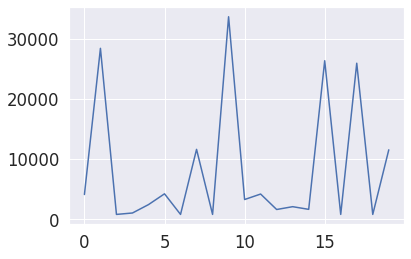

In [7]:
sns.lineplot(x = range(len(ep_rewards_rn)), y = ep_rewards_rn, ci = 'sd')

In [9]:
np.mean(ep_rewards_rn)

8310.631625366212